In [2]:
%cd ~/protein-transfer

/home/francesca/protein-transfer


In [3]:
%load_ext blackcellmagic

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
def df2plot(carp_name):
    df = pd.read_csv(f"pretrain_checkpoints/carp/cnn-{carp_name}-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])
    plt.plot(df.steps, df.loss, label = "loss")
    plt.plot(df.steps, df.accuracy, label = "accuracy")
    plt.plot(df.steps, df.tokens, label = "tokens")
    plt.legend()
    plt.show()

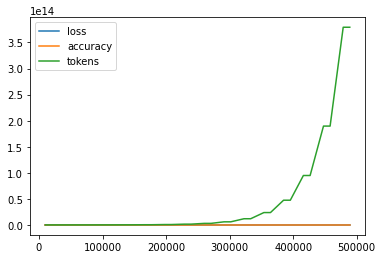

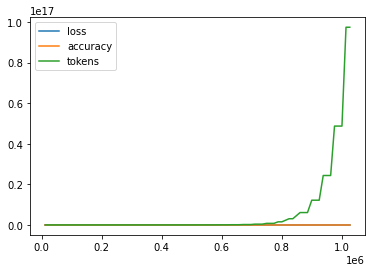

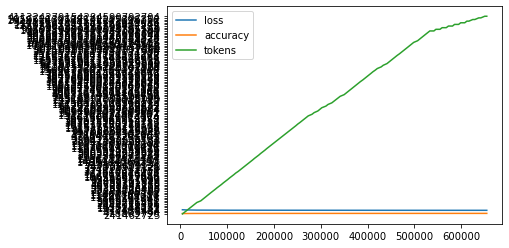

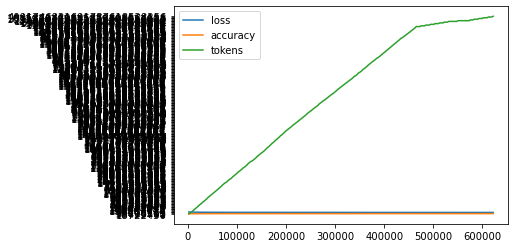

In [7]:

df2plot("600k")
df2plot("38M")
df2plot("76M")
df2plot("640M")

In [8]:
def df2logyplot(carp_name):
    df = pd.read_csv(f"pretrain_checkpoints/carp/cnn-{carp_name}-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])
    plt.semilogy(df.steps, df.loss, label = "loss")
    plt.semilogy(df.steps, df.accuracy, label = "accuracy")
    plt.semilogy(df.steps, df.tokens, label = "tokens")
    plt.legend()
    plt.show()

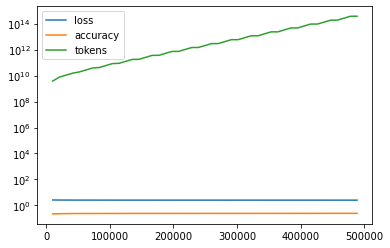

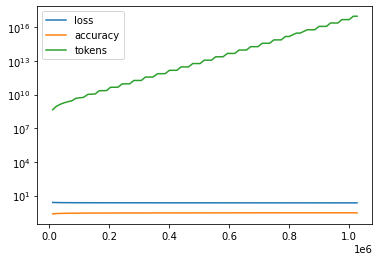

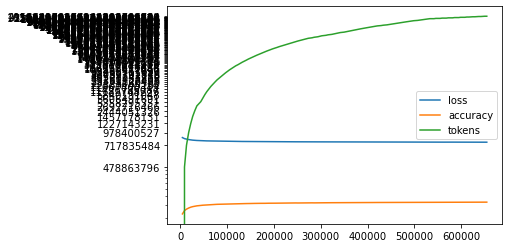

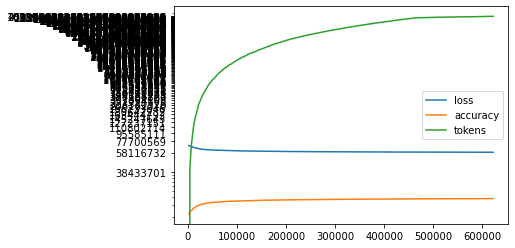

In [9]:
df2logyplot("600k")
df2logyplot("38M")
df2logyplot("76M")
df2logyplot("640M")

In [24]:
step_600k = pd.read_csv("pretrain_checkpoints/carp/cnn-600k-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])["steps"].to_numpy()
step_600k

array([ 10091,  20680,  41611,  52039,  72798,  83572, 104124, 114344,
       135254, 145904, 166518, 177086, 197618, 208054, 228828, 239263,
       260093, 270650, 291102, 301691, 322516, 333028, 353793, 364178,
       384774, 395395, 415934, 426529, 447570, 457988, 478594, 488942])

In [23]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [27]:
find_nearest(step_600k, step_600k[-1] / 2), find_nearest(
    step_600k, step_600k[-1] / 2 / 2
), find_nearest(step_600k, step_600k[-1] / 2 / 2 / 2)

(239263, 114344, 52039)

In [30]:
def df2steppt(carp_name):
    df_step = pd.read_csv(
        f"pretrain_checkpoints/carp/cnn-{carp_name}-metrics.csv",
        header=None,
        names=["loss", "accuracy", "tokens", "steps"],
    )["steps"].to_numpy()
    return {
        "1/2": find_nearest(df_step, df_step[-1] / 2),
        "1/4": find_nearest(df_step, df_step[-1] / 2 / 2),
        "1/8": find_nearest(df_step, df_step[-1] / 2 / 2 / 2),
    }

In [34]:
from scr.params.emb import CARP_INFO

In [38]:
for carp_name in CARP_INFO.keys():
    carp_name = carp_name.split("carp_")[-1] 
    print(f"{carp_name}: {df2steppt(carp_name)}")

600k: (239263, 114344, 52039)
38M: (517622, 256897, 129575)
76M: (327960, 162959, 83180)
640M: (311757, 154698, 78810)


In [33]:
df2steppt("600k")
df2steppt("38M")
df2steppt("76M")
df2steppt("640M")

(311757, 154698, 78810)

In [12]:
pd.read_csv("pretrain_checkpoints/carp/cnn-38M-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])["steps"]

0       12359
1       24959
2       37534
3       51277
4       63820
       ...   
73     976494
74     989071
75    1001317
76    1014825
77    1027410
Name: steps, Length: 78, dtype: int64

In [ ]:
find_nearest(step_600k, step_600k[-1] / 2), find_nearest(
    step_600k, step_600k[-1] / 2 / 2
), find_nearest(step_600k, step_600k[-1] / 2 / 2 / 2)

In [21]:
1027410/2/2/2, 1027410/2/2, 1027410/2

(128426.25, 256852.5, 513705.0)

In [15]:
pd.read_csv("pretrain_checkpoints/carp/cnn-76M-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])["steps"]

0        4307
1        8730
2       12997
3       17646
4       22097
        ...  
133    629038
134    637344
135    641786
136    650106
137    654533
Name: steps, Length: 138, dtype: int64

In [16]:
pd.read_csv("pretrain_checkpoints/carp/cnn-640M-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])["steps"]

0        1954
1        3983
2        6021
3        8039
4        9913
        ...  
332    613947
333    615756
334    617748
335    619523
336    621983
Name: steps, Length: 337, dtype: int64

In [5]:
cnn38m = pd.read_csv("pretrain_checkpoints/carp/cnn-38M-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])

In [6]:
cnn38m.columns

Index(['loss', 'accuracy', 'tokens', 'steps'], dtype='object')

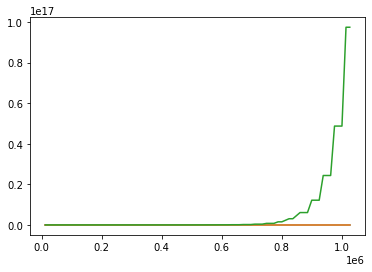

In [7]:
plt.plot(cnn38m.steps, cnn38m.loss, label = "loss")
plt.plot(cnn38m.steps, cnn38m.accuracy, label = "accuracy")
plt.plot(cnn38m.steps, cnn38m.tokens, label = "tokens")

In [4]:
from collections import OrderedDict

import torch
from sequence_models.pretrained import load_model_and_alphabet

In [5]:
encoder_name = "carp_600k"

In [6]:
model, collater = load_model_and_alphabet(encoder_name)

In [7]:
# to load
device = torch.device('cuda:1')
checkpoint = torch.load('pretrain_checkpoints/carp/carp_600k/checkpoint239263.tar', map_location=device)
# model.load_state_dict(checkpoint['state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer'])

In [8]:
checkpoint.keys()

dict_keys(['step', 'tokens', 'model_state_dict', 'optimizer_state_dict', 'scheduler_state_dict', 'epoch'])

In [9]:
checkpoint["model_state_dict"]

OrderedDict([('module.embedder.embedder.weight',
              tensor([[-6.8164e-01, -9.1113e-01, -5.6000e-02, -2.0337e-01,  8.5840e-01,
                        1.2964e-01, -1.6211e-01, -1.9268e+00],
                      [ 6.2164e-02, -1.2539e+00,  7.4072e-01,  4.0942e-01,  2.1698e-02,
                        3.8379e-01,  1.0830e+00, -2.6245e-01],
                      [-2.7954e-01, -1.0986e+00,  6.3037e-01,  5.4688e-01,  5.4492e-01,
                       -1.5381e+00,  2.9614e-01,  1.4170e+00],
                      [ 5.9814e-01, -1.5161e-01, -2.0020e-01, -7.1472e-02,  1.2852e+00,
                        1.0557e+00,  7.5928e-01, -3.8184e-01],
                      [-6.1572e-01, -3.1689e-01, -4.4360e-01, -2.8003e-01,  2.8979e-01,
                        1.6162e-01,  3.3130e-01,  5.4590e-01],
                      [ 4.3060e-02,  9.8975e-01, -5.6689e-01, -4.7168e-01,  7.7393e-02,
                        1.2920e+00, -1.2197e+00, -1.4023e+00],
                      [-2.2766e-01,  6.4014e-

In [10]:
torch.load('pretrain_checkpoints/carp/carp_600k/checkpoint52039.tar', map_location=device)["model_state_dict"]

OrderedDict([('module.embedder.embedder.weight',
              tensor([[-9.4775e-01, -1.0479e+00, -1.4404e-01, -3.9771e-01,  8.0078e-01,
                        4.2212e-01, -2.7808e-01, -2.0625e+00],
                      [ 2.1716e-01, -1.3799e+00,  5.9277e-01,  3.6768e-01, -1.5186e-01,
                        9.3457e-01,  1.2451e+00, -3.0713e-01],
                      [-9.1748e-01, -1.4336e+00,  6.4453e-01,  6.7383e-01,  7.1240e-01,
                       -1.6777e+00,  1.8463e-02,  1.6934e+00],
                      [ 7.1973e-01, -4.0063e-01, -2.0227e-01,  7.1411e-02,  1.4424e+00,
                        1.2422e+00,  8.6133e-01, -6.2158e-01],
                      [-6.7920e-01, -1.0980e-01, -4.6045e-01, -1.5236e-02,  2.7905e-01,
                        2.5562e-01,  5.4053e-01,  5.4395e-01],
                      [-6.8237e-02,  9.1211e-01, -4.0991e-01, -3.1714e-01,  3.2739e-01,
                        1.8613e+00, -1.4141e+00, -1.5859e+00],
                      [-3.7720e-01,  7.6807e-

In [17]:
model.load_state_dict(OrderedDict([(k.replace("module", "model"), v) if "module" in k else (k, v) for k, v in checkpoint["model_state_dict"].items()]))  # Choose whatever GPU device number you want
model.to(device)

CARP(
  (model): ByteNetLM(
    (embedder): ByteNet(
      (embedder): Embedding(30, 8, padding_idx=28)
      (up_embedder): PositionFeedForward(
        (conv): Conv1d(8, 128, kernel_size=(1,), stride=(1,))
      )
      (layers): ModuleList(
        (0): ByteNetBlock(
          (conv): MaskedConv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,))
          (sequence1): Sequential(
            (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (1): GELU(approximate=none)
            (2): PositionFeedForward(
              (conv): Conv1d(128, 64, kernel_size=(1,), stride=(1,))
            )
            (3): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
            (4): GELU(approximate=none)
          )
          (sequence2): Sequential(
            (0): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
            (1): GELU(approximate=none)
            (2): PositionFeedForward(
              (conv): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
    

In [21]:
CARP_CHECKPOINTS = {
    "carp_600k": {"1/2": 239263, "1/4": 114344, "1/8": 52039},
    "carp_38M": {"1/2": 517622, "1/4": 256897, "1/8": 129575},
    "carp_76M": {"1/2": 327960, "1/4": 162959, "1/8": 83180},
    "carp_640M": {"1/2": 311757, "1/4": 154698, "1/8": 78810},
}

In [24]:
import os

checkpoint_folder = "test/test"
encoder_name = "carp_600k"
checkpoint = "1/2"

checkpoint_path = (
    f"{os.path.normpath(checkpoint_folder)}/{encoder_name}/"
    f"checkpoint{str(CARP_CHECKPOINTS[encoder_name][checkpoint])}.tar"
)
checkpoint_path

'test/test/carp_600k/checkpoint239263.tar'